Notebook by -- Peace

Link to hackathon -- https://zindi.africa/hackathons/dsn-pre-bootcamp-hackathon-expresso-churn-prediction-challenge


# DSN EXPRESSO CHURN PRE-BOOTCAMP CHALLENGE 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train= pd.read_csv('Trainchurn.csv')
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [3]:
test=pd.read_csv('Testchurn.csv')
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  object 
 1   REGION          60707 non-null   object 
 2   TENURE          100000 non-null  object 
 3   MONTANT         65049 non-null   float64
 4   FREQUENCE_RECH  65049 non-null   float64
 5   REVENUE         66510 non-null   float64
 6   ARPU_SEGMENT    66510 non-null   float64
 7   FREQUENCE       66510 non-null   float64
 8   DATA_VOLUME     50662 non-null   float64
 9   ON_NET          63617 non-null   float64
 10  ORANGE          58800 non-null   float64
 11  TIGO            40212 non-null   float64
 12  ZONE1           7680 non-null    float64
 13  ZONE2           6422 non-null    float64
 14  MRG             100000 non-null  object 
 15  REGULARITY      100000 non-null  int64  
 16  TOP_PACK        58297 non-null   object 
 17  FREQ_TOP_PA

In [6]:
train.isnull().sum().sort_values(ascending=False)

ZONE2             374487
ZONE1             368310
TIGO              239386
DATA_VOLUME       196854
TOP_PACK          167329
FREQ_TOP_PACK     167329
ORANGE            166317
REGION            157520
ON_NET            145819
MONTANT           140277
FREQUENCE_RECH    140277
FREQUENCE         134663
ARPU_SEGMENT      134663
REVENUE           134663
TENURE                 0
CHURN                  0
MRG                    0
REGULARITY             0
user_id                0
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending=False)

ZONE2             93578
ZONE1             92320
TIGO              59788
DATA_VOLUME       49338
TOP_PACK          41703
FREQ_TOP_PACK     41703
ORANGE            41200
REGION            39293
ON_NET            36383
FREQUENCE_RECH    34951
MONTANT           34951
FREQUENCE         33490
ARPU_SEGMENT      33490
REVENUE           33490
MRG                   0
REGULARITY            0
TENURE                0
user_id               0
dtype: int64

In [8]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


# Data visualisation

In [9]:
def numeric_distplot(df):
    for var in df.columns:
        if df[var].dtype!='object':
            print(df[var].describe())
            plt.figure(figsize=(12,5))
            plt.title('Distribution of '+ var )
            ax=sns.distplot(df[var].dropna())
            plt.tight_layout()
            plt.show()
        
    

In [10]:
train.set_index('user_id',inplace=True)
test.set_index('user_id',inplace=True)


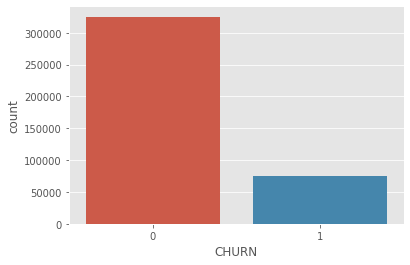

In [11]:
sns.countplot(x='CHURN',data=train)

In [12]:
train['CHURN'].value_counts(normalize=True)

0    0.81289
1    0.18711
Name: CHURN, dtype: float64

In [13]:
df=pd.concat([train,test])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

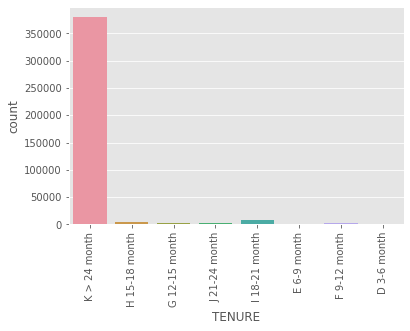

In [14]:
sns.countplot(x='TENURE',data=train)
plt.xticks(rotation=90)

# Data pre-processing

In [15]:
train[train['TENURE']=='H 15-18 month']

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
8ebce4e82fa049f96ff1aa460217171af4e4ede1,SAINT-LOUIS,H 15-18 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1
bc9feb607c2044ebf202991159474f09ecbc3076,KOLDA,H 15-18 month,17400.0,30.0,17900.0,5967.0,29.0,2.0,556.0,1205.0,6.0,NaN,3.0,NO,61,Jokko_Daily,21.0,0
67fd0be27130ffab807eba0ecaf44fed0e163b06,NaN,H 15-18 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
4dbc8c6c854184936eb0b0ffb828677102e12df1,SAINT-LOUIS,H 15-18 month,3600.0,7.0,3590.0,1197.0,8.0,4113.0,60.0,4.0,18.0,NaN,NaN,NO,33,"Data:490F=1GB,7d",4.0,0
3611b63408f2cc4d83b1814aa7b46769a548da87,NaN,H 15-18 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
afec1282d94db0f8d430d170fb57dec6f71812cf,TAMBACOUNDA,H 15-18 month,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
840bc087fb4006cc1757c049608b2cde038d4b73,KOLDA,H 15-18 month,NaN,NaN,147.0,49.0,3.0,NaN,1.0,0.0,NaN,NaN,NaN,NO,7,NaN,NaN,0
b5aea35ce93325cab18ba994edaa9401db841e5b,NaN,H 15-18 month,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1


In [16]:
train['MRG'].replace(train['MRG'].unique(),range(1,(train['MRG'].nunique()+1)),inplace=True)
train['MRG']

user_id
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063    1
71c44b5ba328db5c4192a80f7cf8f244d9350ed0    1
ce46411b1526c94f20a383b8cb188f8d27f82a0a    1
f467cdb6669818373c26c2bad44e01ba66f97d21    1
ec45e1a1888a32b5dcce0954cfec20c6e037db31    1
                                           ..
a892ad4ed0eda8dc721733200c47147763b183ec    1
13daa3a651bf0192a413b339c4766aeafc6d1636    1
767f596aee426962f7d92f4de8d7b232cdc17568    1
b831e4d3b59a1e294e9e0a2aab391bc12d50845c    1
a80e3a164986e489102cfb538fa62e16ecc28adf    1
Name: MRG, Length: 400000, dtype: int64

In [17]:
sum(train['MRG']!=1)

0

In [18]:
df.drop(['MRG'],axis=1,inplace=True)


In [19]:
df.dtypes

REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN             float64
dtype: object

In [20]:
#train['TOP_PACK']=train['TOP_PACK'].apply(lambda x:str(x).split('=')[0])
#train['TOP_PACK']=train['TOP_PACK'].apply(lambda x:str(x).split()[0])
train['TOP_PACK'].unique()

array(['All-net 500F=2000F;5d', 'Data: 100 F=40MB,24H',
       'On net 200F=Unlimited _call24H', nan, 'Data:490F=1GB,7d',
       'Data:1000F=5GB,7d', 'VAS(IVR_Radio_Daily)',
       'Data:200F=Unlimited,24H', 'Jokko_Daily',
       'Mixt 250F=Unlimited_call24H', 'Data: 200 F=100MB,24H',
       'MIXT:500F= 2500F on net _2500F off net;2d', 'Data:1000F=2GB,30d',
       'IVR Echat_Daily_50F', 'On-net 1000F=10MilF;10d',
       'All-net 600F= 3000F ;5d', 'Twter_U2opia_Daily',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'Twter_U2opia_Weekly', 'All-net 500F =2000F_AllNet_Unlimited',
       'Yewouleen_PKG', 'On-net 500=4000,10d', 'On-net 200F=60mn;1d',
       'Data:3000F=10GB,30d', 'Incoming_Bonus_woma',
       'All-net 1000=5000;5d', 'Data:500F=2GB,24H', 'Data:300F=100MB,2d',
       'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t', 'Data:50F=30MB_24H',
       'All-net 1000F=(3000F On+3000F Off);5d',
       'All-net 500F=1250F_AllNet_1250_Onnet;48h',
       'Data:150F=

In [21]:
#numeric_distplot(train.drop('CHURN',axis=1))

In [22]:
missing_col=train.columns[train.isna().any()]
missing_col

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1',
       'ZONE2', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')

In [23]:
for col in missing_col.drop(['REGION','TOP_PACK']):
    df[col].fillna(df[col].median(),inplace=True)

In [24]:
df['REGION'].fillna(0,inplace=True)
df['TOP_PACK'].fillna(0,inplace=True)

In [25]:
numeric= df.drop('CHURN',axis=1).select_dtypes(include='number').columns
skew_fts=df[numeric].skew().sort_values(ascending=False)
high_skew=skew_fts[skew_fts>0.5]
high_skew

ZONE2             59.708629
ZONE1             57.950282
DATA_VOLUME       35.821500
TIGO              18.477385
ON_NET            10.388584
ORANGE             9.292491
FREQ_TOP_PACK      5.672979
MONTANT            4.991462
ARPU_SEGMENT       4.668349
REVENUE            4.668335
FREQUENCE_RECH     2.895472
FREQUENCE          2.451275
dtype: float64

In [26]:
for column in high_skew.index:
    df[column]= df[column].apply(np.log1p) 

In [27]:
df.drop(['ZONE2','ZONE1'],axis=1,inplace=True)

In [29]:
df['TOP_PACK']=pd.factorize(df['TOP_PACK'])[0]
#df['TENURE']=pd.factorize(df['TENURE'])[0]


In [36]:
df.isna().sum()

REGION                 0
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
REGULARITY             0
TOP_PACK               0
FREQ_TOP_PACK          0
CHURN             100000
dtype: int64

In [37]:
df.dtypes

REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
REGULARITY          int64
TOP_PACK            int64
FREQ_TOP_PACK     float64
CHURN             float64
dtype: object

In [38]:
df

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,9.741027,3.496508,9.798183,8.699681,3.555348,5.590987,4.584967,5.874931,1.945910,62,0,3.583519,0.0
71c44b5ba328db5c4192a80f7cf8f244d9350ed0,0,K > 24 month,8.366603,3.401197,8.395703,7.297768,3.637586,7.475906,2.197225,1.386294,0.000000,40,1,3.135494,0.0
ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,7.313887,1.386294,7.313887,6.216606,1.386294,5.590987,3.433987,3.433987,1.945910,32,0,1.386294,0.0
f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,7.313887,1.386294,7.823246,6.725034,1.609438,0.000000,5.075174,3.828641,2.995732,18,2,1.386294,0.0
ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,8.006701,2.079442,6.212606,5.117994,1.386294,0.693147,0.693147,1.386294,1.945910,50,3,1.791759,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c6bcb3336795a18eb6c0bc7e19078a0704ef4d7e,LOUGA,K > 24 month,5.303305,0.693147,3.044522,2.079442,0.693147,5.590987,3.332205,0.000000,1.945910,46,3,1.791759,NaN
a44b4e44dc70115ed5bf971ebb4193dd536e87f0,TAMBACOUNDA,K > 24 month,6.908755,0.693147,6.906755,5.811141,1.609438,0.693147,1.945910,1.386294,1.945910,26,3,1.791759,NaN
a2f84faffbc995bd0e2d726fa4ffdb93f11646ed,0,I 18-21 month,7.496097,2.079442,7.495542,6.398595,2.302585,4.406719,1.098612,0.000000,1.945910,60,7,1.791759,NaN


In [39]:
train=df.iloc[:400000].copy()
train

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,9.741027,3.496508,9.798183,8.699681,3.555348,5.590987,4.584967,5.874931,1.945910,62,0,3.583519,0.0
71c44b5ba328db5c4192a80f7cf8f244d9350ed0,0,K > 24 month,8.366603,3.401197,8.395703,7.297768,3.637586,7.475906,2.197225,1.386294,0.000000,40,1,3.135494,0.0
ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,7.313887,1.386294,7.313887,6.216606,1.386294,5.590987,3.433987,3.433987,1.945910,32,0,1.386294,0.0
f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,7.313887,1.386294,7.823246,6.725034,1.609438,0.000000,5.075174,3.828641,2.995732,18,2,1.386294,0.0
ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,8.006701,2.079442,6.212606,5.117994,1.386294,0.693147,0.693147,1.386294,1.945910,50,3,1.791759,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a892ad4ed0eda8dc721733200c47147763b183ec,TAMBACOUNDA,K > 24 month,6.552508,1.098612,6.558198,5.463832,1.386294,5.590987,2.564949,2.708050,1.945910,46,0,0.693147,0.0
13daa3a651bf0192a413b339c4766aeafc6d1636,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,14,3,1.791759,0.0
767f596aee426962f7d92f4de8d7b232cdc17568,0,K > 24 month,6.552508,1.098612,6.551080,5.455321,1.791759,5.472271,0.693147,3.401197,1.945910,15,1,1.386294,0.0


In [40]:
test=df.iloc[-100000:].copy()
test.drop('CHURN',axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, af900d87e73b7ff6509d2203df4704a98aa5f2a6 to c08a2d84b87c1f5d4bb318114f508b77aa8e2663
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          100000 non-null  object 
 1   TENURE          100000 non-null  object 
 2   MONTANT         100000 non-null  float64
 3   FREQUENCE_RECH  100000 non-null  float64
 4   REVENUE         100000 non-null  float64
 5   ARPU_SEGMENT    100000 non-null  float64
 6   FREQUENCE       100000 non-null  float64
 7   DATA_VOLUME     100000 non-null  float64
 8   ON_NET          100000 non-null  float64
 9   ORANGE          100000 non-null  float64
 10  TIGO            100000 non-null  float64
 11  REGULARITY      100000 non-null  int64  
 12  TOP_PACK        100000 non-null  int64  
 13  FREQ_TOP_PACK   100000 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.4+ MB


In [41]:
train['CHURN'].value_counts()

0.0    325156
1.0     74844
Name: CHURN, dtype: int64

In [42]:
train_0=train[train['CHURN']==0].sample(100000)
train_1=train[train['CHURN']==1]
train=pd.concat([train_0,train_1])
train['CHURN'].value_counts()

0.0    100000
1.0     74844
Name: CHURN, dtype: int64

In [43]:
import sklearn.utils
from sklearn.utils import shuffle
train=shuffle(train).reset_index(drop=True)
train

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,1,3,1.791759,1.0
1,KAFFRINE,K > 24 month,8.779711,2.639057,8.779865,7.681560,2.708050,0.000000,4.753590,5.135798,0.693147,49,0,2.639057,0.0
2,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,4,3,1.791759,1.0
3,0,K > 24 month,7.346655,1.791759,7.346655,6.249975,1.609438,0.000000,5.598422,3.178054,1.945910,60,9,1.609438,0.0
4,SAINT-LOUIS,K > 24 month,8.160804,1.945910,8.132119,7.034388,2.397895,5.590987,3.258097,3.806662,1.945910,44,20,1.098612,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174839,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,3,3,1.791759,1.0
174840,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,4,3,1.791759,1.0
174841,0,K > 24 month,6.908755,1.609438,6.908755,5.811141,1.609438,7.636752,1.609438,3.044522,0.000000,1,7,1.609438,1.0
174842,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,1,3,1.791759,0.0


# Setting values to predict and target values

In [44]:
X=train.drop('CHURN',axis=1)
y=train['CHURN'].apply(int)

In [45]:
y.value_counts()

0    100000
1     74844
Name: CHURN, dtype: int64

In [46]:
X

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,1,3,1.791759
1,KAFFRINE,K > 24 month,8.779711,2.639057,8.779865,7.681560,2.708050,0.000000,4.753590,5.135798,0.693147,49,0,2.639057
2,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,4,3,1.791759
3,0,K > 24 month,7.346655,1.791759,7.346655,6.249975,1.609438,0.000000,5.598422,3.178054,1.945910,60,9,1.609438
4,SAINT-LOUIS,K > 24 month,8.160804,1.945910,8.132119,7.034388,2.397895,5.590987,3.258097,3.806662,1.945910,44,20,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174839,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,3,3,1.791759
174840,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,4,3,1.791759
174841,0,K > 24 month,6.908755,1.609438,6.908755,5.811141,1.609438,7.636752,1.609438,3.044522,0.000000,1,7,1.609438
174842,0,K > 24 month,8.006701,2.079442,8.006701,6.908755,2.302585,5.590987,3.332205,3.401197,1.945910,1,3,1.791759


# Pre-processing data to predict

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_norm=sc.fit_transform(X.drop(['TOP_PACK','REGION','TENURE'],axis=1))
X_norm=pd.DataFrame(X_norm,columns=X.drop(columns=['TOP_PACK','REGION','TENURE']).columns,index=X.drop(columns=['TOP_PACK','REGION','TENURE']).index)

test_norm=pd.DataFrame(sc.transform(test.drop(columns=['TOP_PACK','REGION','TENURE'])),columns=test.drop(columns=['TOP_PACK','REGION','TENURE']).columns,index=test.drop(columns=['TOP_PACK','REGION','TENURE']).index)

lst=['TOP_PACK','REGION','TENURE']
for i in lst:
    X_norm[i]=X[i]    
    test_norm[i]=test[i]
    
#X_norm[['TOP_PACK','REGION','TENURE']]= X[['TOP_PACK','REGION','TENURE']]
#test_norm[['TOP_PACK','REGION','TENURE']]=test[['TOP_PACK','REGION','TENURE']]                 


In [49]:
X_norm=pd.get_dummies(columns=['REGION','TENURE'],data=X_norm,drop_first=True)
test_norm=pd.get_dummies(columns=['REGION','TENURE'],data=test_norm,drop_first=True)

In [50]:
X_norm.isnull().sum()

MONTANT                 0
FREQUENCE_RECH          0
REVENUE                 0
ARPU_SEGMENT            0
FREQUENCE               0
DATA_VOLUME             0
ON_NET                  0
ORANGE                  0
TIGO                    0
REGULARITY              0
FREQ_TOP_PACK           0
TOP_PACK                0
REGION_DAKAR            0
REGION_DIOURBEL         0
REGION_FATICK           0
REGION_KAFFRINE         0
REGION_KAOLACK          0
REGION_KEDOUGOU         0
REGION_KOLDA            0
REGION_LOUGA            0
REGION_MATAM            0
REGION_SAINT-LOUIS      0
REGION_SEDHIOU          0
REGION_TAMBACOUNDA      0
REGION_THIES            0
REGION_ZIGUINCHOR       0
TENURE_E 6-9 month      0
TENURE_F 9-12 month     0
TENURE_G 12-15 month    0
TENURE_H 15-18 month    0
TENURE_I 18-21 month    0
TENURE_J 21-24 month    0
TENURE_K > 24 month     0
dtype: int64

In [52]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2
select=SelectKBest(f_classif, 20)
X_new=select.fit_transform(X_norm,y)
test_new=select.transform(test_norm)

In [53]:

X_norm

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.935549,...,0,0,0,0,0,0,0,0,0,1
1,0.917812,0.875582,0.787458,0.797616,0.661830,-2.126270,0.941940,1.577550,-1.672795,1.267262,...,0,0,0,0,0,0,0,0,0,1
2,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.797873,...,0,0,0,0,0,0,0,0,0,1
3,-0.588379,-0.341570,-0.377336,-0.387305,-0.865912,-2.126270,1.490917,-0.128640,-0.041653,1.772073,...,0,0,0,0,0,0,0,0,0,1
4,0.267319,-0.120131,0.261024,0.261952,0.230526,0.181034,-0.029842,0.419197,-0.041653,1.037803,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174839,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.843765,...,0,0,0,0,0,0,0,0,0,1
174840,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.797873,...,0,0,0,0,0,0,0,0,0,1
174841,-1.048627,-0.603477,-0.733225,-0.750527,-0.865912,1.025285,-1.101152,-0.245014,-2.575296,-0.935549,...,0,0,0,0,0,0,0,0,0,1
174842,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.935549,...,0,0,0,0,0,0,0,0,0,1


In [54]:
test_norm

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
user_id,,,,,,,,,,,,,,,,,,,,,
af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.935549,...,0,0,0,0,0,0,0,0,0,1
5335efd940280b82143272275637d1e65d37eadb,0.105351,0.071688,-4.399276,-4.412965,-2.140116,0.181034,0.018313,0.065831,-0.041653,-0.889657,...,0,0,0,0,0,0,0,0,0,1
a581f4fa08677c26f83f643248c667e241043086,-0.374514,1.067401,-0.057118,-0.062423,1.194423,0.361496,0.018313,-1.086090,-1.144865,0.257641,...,0,0,0,0,0,0,0,0,0,1
64f67177d0775262b8087a9e2e3b8061b6324ae6,0.105351,0.392236,0.043773,0.040920,0.661830,0.270650,-2.146976,-0.128640,-0.479752,1.129587,...,0,0,0,0,0,0,0,0,0,1
0d6009a4594c4be22449b8d9cc01a0bcea98faea,2.592961,2.645569,2.107658,2.141948,2.279320,0.181034,1.010964,2.610261,4.766039,1.817965,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c6bcb3336795a18eb6c0bc7e19078a0704ef4d7e,-2.736009,-1.919738,-3.873751,-3.839248,-2.140116,0.181034,0.018313,-2.898340,-0.041653,1.129587,...,0,0,0,0,0,0,0,0,0,1
a44b4e44dc70115ed5bf971ebb4193dd536e87f0,-1.048627,-1.919738,-0.734850,-0.750527,-0.865912,-1.840220,-0.882510,-1.690173,-0.041653,0.211749,...,1,0,0,0,0,0,0,0,0,1
a2f84faffbc995bd0e2d726fa4ffdb93f11646ed,-0.431310,0.071688,-0.256333,-0.264292,0.097986,-0.307693,-1.433090,-2.898340,-0.041653,1.772073,...,0,0,0,0,0,0,0,1,0,0


In [55]:
X_norm

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.935549,...,0,0,0,0,0,0,0,0,0,1
1,0.917812,0.875582,0.787458,0.797616,0.661830,-2.126270,0.941940,1.577550,-1.672795,1.267262,...,0,0,0,0,0,0,0,0,0,1
2,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.797873,...,0,0,0,0,0,0,0,0,0,1
3,-0.588379,-0.341570,-0.377336,-0.387305,-0.865912,-2.126270,1.490917,-0.128640,-0.041653,1.772073,...,0,0,0,0,0,0,0,0,0,1
4,0.267319,-0.120131,0.261024,0.261952,0.230526,0.181034,-0.029842,0.419197,-0.041653,1.037803,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174839,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.843765,...,0,0,0,0,0,0,0,0,0,1
174840,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.797873,...,0,0,0,0,0,0,0,0,0,1
174841,-1.048627,-0.603477,-0.733225,-0.750527,-0.865912,1.025285,-1.101152,-0.245014,-2.575296,-0.935549,...,0,0,0,0,0,0,0,0,0,1
174842,0.105351,0.071688,0.159095,0.157966,0.097986,0.181034,0.018313,0.065831,-0.041653,-0.935549,...,0,0,0,0,0,0,0,0,0,1


In [56]:
y.value_counts()

0    100000
1     74844
Name: CHURN, dtype: int64

# Importing necessary libraries for modelling and predicting

In [58]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(LogisticRegression(max_iter=200),X_new, y,cv=10,scoring='neg_log_loss')
#sklearn.metrics.SCORERS.keys()
#pd.DataFrame(cv.cv_results_)[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score')


In [ ]:
np.mean(cv)


In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(LogisticRegression(max_iter=200),X_new, y,cv=5)

In [ ]:
np.mean(cv)

In [59]:
lr=LogisticRegression()
rf=RandomForestClassifier()
gbm=GradientBoostingClassifier(learning_rate=0.05,n_estimators=100)
dt= DecisionTreeClassifier()
xgb=XGBClassifier()
cb=CatBoostClassifier()
lgb=LGBMClassifier()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [61]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
gbm.fit(X_train,y_train)
cb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
dt.fit(X_train,y_train)
lgb.fit(X_train,y_train)


C:\Users\ADEGBITE BOLA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.078755
0:	learn: 0.6301564	total: 701ms	remaining: 11m 40s
1:	learn: 0.5807356	total: 824ms	remaining: 6m 51s
2:	learn: 0.5416606	total: 929ms	remaining: 5m 8s
3:	learn: 0.5107059	total: 1.01s	remaining: 4m 11s
4:	learn: 0.4828776	total: 1.1s	remaining: 3m 38s
5:	learn: 0.4612113	total: 1.2s	remaining: 3m 19s
6:	learn: 0.4450604	total: 1.27s	remaining: 3m
7:	learn: 0.4311038	total: 1.39s	remaining: 2m 51s
8:	learn: 0.4212899	total: 1.46s	remaining: 2m 40s
9:	learn: 0.4128927	total: 1.53s	remaining: 2m 31s
10:	learn: 0.4035738	total: 1.65s	remaining: 2m 28s
11:	learn: 0.3968032	total: 1.72s	remaining: 2m 21s
12:	learn: 0.3909135	total: 1.8s	remaining: 2m 16s
13:	learn: 0.3848211	total: 1.89s	remaining: 2m 13s
14:	learn: 0.3796956	total: 2s	remaining: 2m 11s
15:	learn: 0.3756924	total: 2.07s	remaining: 2m 7s
16:	learn: 0.3723625	total: 2.18s	remaining: 2m 5s
17:	learn: 0.3684520	total: 2.25s	remaining: 2m 2s
18:	learn: 0.3652136	total: 2.32s	remaining: 1m 59s
19:	l

163:	learn: 0.3244777	total: 10.3s	remaining: 52.5s
164:	learn: 0.3244511	total: 10.4s	remaining: 52.4s
165:	learn: 0.3244173	total: 10.4s	remaining: 52.2s
166:	learn: 0.3243654	total: 10.4s	remaining: 52.1s
167:	learn: 0.3243314	total: 10.5s	remaining: 52s
168:	learn: 0.3242956	total: 10.6s	remaining: 51.9s
169:	learn: 0.3242512	total: 10.6s	remaining: 51.7s
170:	learn: 0.3242018	total: 10.6s	remaining: 51.6s
171:	learn: 0.3241529	total: 10.7s	remaining: 51.5s
172:	learn: 0.3241055	total: 10.8s	remaining: 51.4s
173:	learn: 0.3240892	total: 10.8s	remaining: 51.3s
174:	learn: 0.3240613	total: 10.8s	remaining: 51.1s
175:	learn: 0.3240270	total: 10.9s	remaining: 51.1s
176:	learn: 0.3240019	total: 11s	remaining: 51.1s
177:	learn: 0.3239626	total: 11s	remaining: 51s
178:	learn: 0.3239341	total: 11.1s	remaining: 50.9s
179:	learn: 0.3238938	total: 11.1s	remaining: 50.8s
180:	learn: 0.3238699	total: 11.2s	remaining: 50.6s
181:	learn: 0.3238384	total: 11.2s	remaining: 50.5s
182:	learn: 0.323789

324:	learn: 0.3195781	total: 18.6s	remaining: 38.7s
325:	learn: 0.3195521	total: 18.7s	remaining: 38.6s
326:	learn: 0.3195281	total: 18.7s	remaining: 38.5s
327:	learn: 0.3194973	total: 18.8s	remaining: 38.5s
328:	learn: 0.3194642	total: 18.8s	remaining: 38.4s
329:	learn: 0.3194413	total: 18.9s	remaining: 38.3s
330:	learn: 0.3194339	total: 18.9s	remaining: 38.3s
331:	learn: 0.3194097	total: 19s	remaining: 38.2s
332:	learn: 0.3193856	total: 19s	remaining: 38.1s
333:	learn: 0.3193665	total: 19.1s	remaining: 38.1s
334:	learn: 0.3193493	total: 19.1s	remaining: 38s
335:	learn: 0.3192952	total: 19.2s	remaining: 37.9s
336:	learn: 0.3192723	total: 19.2s	remaining: 37.9s
337:	learn: 0.3192517	total: 19.3s	remaining: 37.8s
338:	learn: 0.3192224	total: 19.3s	remaining: 37.7s
339:	learn: 0.3192009	total: 19.4s	remaining: 37.6s
340:	learn: 0.3191863	total: 19.4s	remaining: 37.6s
341:	learn: 0.3191675	total: 19.5s	remaining: 37.5s
342:	learn: 0.3191422	total: 19.5s	remaining: 37.4s
343:	learn: 0.3191

483:	learn: 0.3160987	total: 30.7s	remaining: 32.7s
484:	learn: 0.3160704	total: 30.8s	remaining: 32.7s
485:	learn: 0.3160502	total: 30.9s	remaining: 32.7s
486:	learn: 0.3160308	total: 31s	remaining: 32.7s
487:	learn: 0.3160132	total: 31.1s	remaining: 32.7s
488:	learn: 0.3159860	total: 31.2s	remaining: 32.6s
489:	learn: 0.3159708	total: 31.3s	remaining: 32.6s
490:	learn: 0.3159670	total: 31.4s	remaining: 32.5s
491:	learn: 0.3159490	total: 31.5s	remaining: 32.5s
492:	learn: 0.3159133	total: 31.6s	remaining: 32.4s
493:	learn: 0.3158900	total: 31.6s	remaining: 32.4s
494:	learn: 0.3158702	total: 31.7s	remaining: 32.3s
495:	learn: 0.3158464	total: 31.7s	remaining: 32.3s
496:	learn: 0.3158267	total: 31.8s	remaining: 32.2s
497:	learn: 0.3158060	total: 31.8s	remaining: 32.1s
498:	learn: 0.3157895	total: 31.9s	remaining: 32s
499:	learn: 0.3157815	total: 32s	remaining: 32s
500:	learn: 0.3157535	total: 32s	remaining: 31.9s
501:	learn: 0.3157283	total: 32.1s	remaining: 31.9s
502:	learn: 0.3157066	

642:	learn: 0.3131132	total: 40.5s	remaining: 22.5s
643:	learn: 0.3130968	total: 40.5s	remaining: 22.4s
644:	learn: 0.3130753	total: 40.6s	remaining: 22.3s
645:	learn: 0.3130414	total: 40.6s	remaining: 22.3s
646:	learn: 0.3130204	total: 40.7s	remaining: 22.2s
647:	learn: 0.3129852	total: 40.7s	remaining: 22.1s
648:	learn: 0.3129663	total: 40.8s	remaining: 22s
649:	learn: 0.3129633	total: 40.8s	remaining: 22s
650:	learn: 0.3129595	total: 40.9s	remaining: 21.9s
651:	learn: 0.3129429	total: 40.9s	remaining: 21.8s
652:	learn: 0.3129276	total: 41s	remaining: 21.8s
653:	learn: 0.3129149	total: 41s	remaining: 21.7s
654:	learn: 0.3128950	total: 41.1s	remaining: 21.6s
655:	learn: 0.3128867	total: 41.1s	remaining: 21.6s
656:	learn: 0.3128580	total: 41.2s	remaining: 21.5s
657:	learn: 0.3128362	total: 41.2s	remaining: 21.4s
658:	learn: 0.3128141	total: 41.3s	remaining: 21.4s
659:	learn: 0.3127959	total: 41.3s	remaining: 21.3s
660:	learn: 0.3127691	total: 41.4s	remaining: 21.2s
661:	learn: 0.312760

803:	learn: 0.3103927	total: 49.7s	remaining: 12.1s
804:	learn: 0.3103745	total: 49.8s	remaining: 12.1s
805:	learn: 0.3103501	total: 49.8s	remaining: 12s
806:	learn: 0.3103281	total: 49.9s	remaining: 11.9s
807:	learn: 0.3103069	total: 49.9s	remaining: 11.9s
808:	learn: 0.3102795	total: 50s	remaining: 11.8s
809:	learn: 0.3102606	total: 50s	remaining: 11.7s
810:	learn: 0.3102459	total: 50.1s	remaining: 11.7s
811:	learn: 0.3102252	total: 50.1s	remaining: 11.6s
812:	learn: 0.3101987	total: 50.2s	remaining: 11.5s
813:	learn: 0.3101790	total: 50.3s	remaining: 11.5s
814:	learn: 0.3101480	total: 50.3s	remaining: 11.4s
815:	learn: 0.3101247	total: 50.4s	remaining: 11.4s
816:	learn: 0.3101076	total: 50.4s	remaining: 11.3s
817:	learn: 0.3100888	total: 50.5s	remaining: 11.2s
818:	learn: 0.3100763	total: 50.5s	remaining: 11.2s
819:	learn: 0.3100416	total: 50.6s	remaining: 11.1s
820:	learn: 0.3100213	total: 50.6s	remaining: 11s
821:	learn: 0.3100004	total: 50.7s	remaining: 11s
822:	learn: 0.3099777	

963:	learn: 0.3079165	total: 57.9s	remaining: 2.16s
964:	learn: 0.3078991	total: 57.9s	remaining: 2.1s
965:	learn: 0.3078724	total: 58s	remaining: 2.04s
966:	learn: 0.3078598	total: 58s	remaining: 1.98s
967:	learn: 0.3078504	total: 58.1s	remaining: 1.92s
968:	learn: 0.3078422	total: 58.2s	remaining: 1.86s
969:	learn: 0.3078392	total: 58.2s	remaining: 1.8s
970:	learn: 0.3078289	total: 58.3s	remaining: 1.74s
971:	learn: 0.3078159	total: 58.3s	remaining: 1.68s
972:	learn: 0.3077962	total: 58.4s	remaining: 1.62s
973:	learn: 0.3077795	total: 58.4s	remaining: 1.56s
974:	learn: 0.3077710	total: 58.5s	remaining: 1.5s
975:	learn: 0.3077544	total: 58.5s	remaining: 1.44s
976:	learn: 0.3077353	total: 58.6s	remaining: 1.38s
977:	learn: 0.3077084	total: 58.6s	remaining: 1.32s
978:	learn: 0.3077052	total: 58.7s	remaining: 1.26s
979:	learn: 0.3076980	total: 58.7s	remaining: 1.2s
980:	learn: 0.3076900	total: 58.8s	remaining: 1.14s
981:	learn: 0.3076753	total: 58.8s	remaining: 1.08s
982:	learn: 0.307652

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
print('LR: {}'.format(log_loss(y_test,lr.predict_proba(X_test)[:,1])))
print('RF: {}'.format(log_loss(y_test,rf.predict_proba(X_test)[:,1])))
print('GBM: {}'.format(log_loss(y_test,gbm.predict_proba(X_test)[:,1])))
print('CB: {}'.format(log_loss(y_test,cb.predict_proba(X_test)[:,1])))
print('XGB: {}'.format(log_loss(y_test,xgb.predict_proba(X_test)[:,1])))
print('DT: {}'.format(log_loss(y_test,dt.predict_proba(X_test)[:,1])))
print('LGB: {}'.format(log_loss(y_test,lgb.predict_proba(X_test)[:,1])))

LR: 0.34530454971728997
RF: 0.40561353806299333
GBM: 0.3571010621069432
CB: 0.33043022620788437
XGB: 0.3383763403167514
DT: 3.05534978936062
LGB: 0.3302037746115156


In [ ]:
lr.score(X_train,y_train)

In [ ]:
print('LR: {}'.format(log_loss(y_test,lr.predict_proba(X_test)[:,1])))
print('RF: {}'.format(log_loss(y_test,rf.predict_proba(X_test)[:,1])))
print('GBM: {}'.format(log_loss(y_test,gbm.predict_proba(X_test)[:,1])))

In [ ]:
prediction= lr.predict_proba(test_new)[:,1]

In [ ]:
subchurn=pd.read_csv('sample_submission.csv')
subchurn['CHURN']=prediction


In [ ]:
subchurn.to_csv('SubChurn4.csv',index=False)